# Order Note Analysis

Goal:  cluster notes

In [5]:
#%pylab inline
%matplotlib inline
%config InlineBackend.figure_format='retina' 

import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import os, sys
import warnings

warnings.filterwarnings('ignore')

In [6]:
import seaborn as sns
sns.set_context('poster')
sns.set_style('whitegrid') 
# sns.set_style('darkgrid') 
# plt.rcParams['figure.figsize'] = 12, 8  # plotsize 

## SQL Source

In [56]:
from decouple import config
config.search_path = '/home/jovyan/work'

In [57]:
engine = create_engine(config('DATABASE_DEV_URL'))

In [58]:
sql = '''

    select top 10 * from Integration.F5503_canned_message_file_parameters_Staging

'''


In [59]:
pf = pd.read_sql_query(sql, engine);

In [60]:
pf.dtypes

Q3KCOO_order_number_document_company     object
Q3DCTO_order_type                        object
Q3DOCO_salesorder_number                float64
Q3LNID_line_number                      float64
Q3$APC_application_code                  object
Q3$PMQ_program_parameter                 object
Q3LNGP_language                          object
Q3INMG_print_message                     object
Q3$SNB_sequence_number                  float64
QCTRDJ_order_date                        object
id                                        int64
chksum                                   object
dtype: object

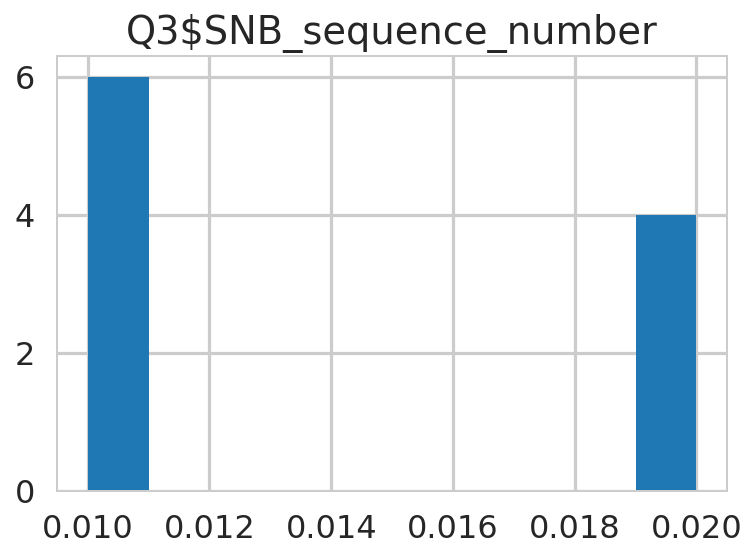

In [61]:
pf.hist('Q3$SNB_sequence_number');

In [62]:
pf.to_pickle('../data/note')

## Pickle Source

In [7]:
pf2 = pd.read_pickle('../data/note')

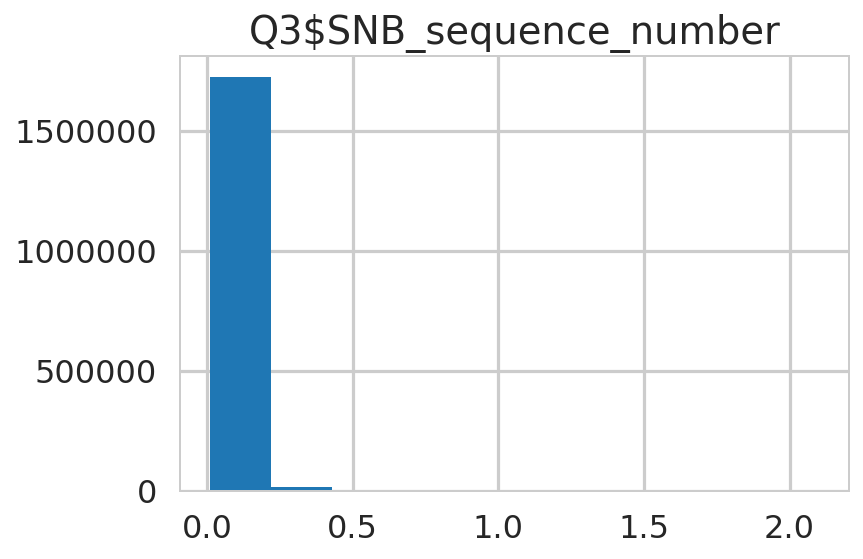

In [4]:
pf2.hist('Q3$SNB_sequence_number');

In [8]:
df = pf2

## cleanup

In [9]:
print(df.dtypes)
df.head()

Q3KCOO_order_number_document_company     object
Q3DCTO_order_type                        object
Q3DOCO_salesorder_number                float64
Q3LNID_line_number                      float64
Q3$APC_application_code                  object
Q3$PMQ_program_parameter                 object
Q3LNGP_language                          object
Q3INMG_print_message                     object
Q3$SNB_sequence_number                  float64
QCTRDJ_order_date                        object
id                                        int64
chksum                                   object
dtype: object


,Q3KCOO_order_number_document_company,Q3DCTO_order_type,Q3DOCO_salesorder_number,Q3LNID_line_number,Q3$APC_application_code,Q3$PMQ_program_parameter,Q3LNGP_language,Q3INMG_print_message,Q3$SNB_sequence_number,QCTRDJ_order_date,id,chksum
0,02000,SZ,11088929.0,999.999,,&11088929 ...,,SPLITINV,0.01,2018-02-14,1172799,b'\xdd\xd91`\x93\xaa\x1e\xa18\x8e\xde\xe0\x03\...
1,02000,SZ,11088930.0,-999.999,,&Customer PO--- A0000223674 ...,,9999,0.01,2018-02-14,1172800,"b'\\,\xfa\x86\x8b\xfa%\xc0\xc6\xb2p\xc2\xfa\x9..."
2,02000,SZ,11088930.0,-999.999,,&****Prices verified in coupa*** ...,,9999,0.02,2018-02-14,1172801,b'\xa1\xd3\xf3\xd0\x08cV\x98u\xa3\xca-\xdf\xb2...
3,02000,SZ,11088931.0,-999.999,,&Customer PO--- A0000223666 ...,,9999,0.01,2018-02-14,1172802,"b'\xa5\x01\xe9\x7f*\xc3mf=]W""\x95-\xaf\xc7\x83..."
4,02000,SZ,11088931.0,-999.999,,&***Prices verified in Coupa*** ...,,9999,0.02,2018-02-14,1172803,b'#9C\x89m?\xa4\xd8\xff\xc72\\\x15\xf38P\xfb\x...


In [10]:
list(df.columns)

['Q3KCOO_order_number_document_company',
 'Q3DCTO_order_type',
 'Q3DOCO_salesorder_number',
 'Q3LNID_line_number',
 'Q3$APC_application_code',
 'Q3$PMQ_program_parameter',
 'Q3LNGP_language',
 'Q3INMG_print_message',
 'Q3$SNB_sequence_number',
 'QCTRDJ_order_date',
 'id',
 'chksum']

In [11]:
df.drop(df.columns[[0,3,4,6,7,8]],axis=1, inplace=True)

In [12]:
df.head()

,Q3DCTO_order_type,Q3DOCO_salesorder_number,Q3$PMQ_program_parameter,QCTRDJ_order_date,id,chksum
0,SZ,11088929.0,&11088929 ...,2018-02-14,1172799,b'\xdd\xd91`\x93\xaa\x1e\xa18\x8e\xde\xe0\x03\...
1,SZ,11088930.0,&Customer PO--- A0000223674 ...,2018-02-14,1172800,"b'\\,\xfa\x86\x8b\xfa%\xc0\xc6\xb2p\xc2\xfa\x9..."
2,SZ,11088930.0,&****Prices verified in coupa*** ...,2018-02-14,1172801,b'\xa1\xd3\xf3\xd0\x08cV\x98u\xa3\xca-\xdf\xb2...
3,SZ,11088931.0,&Customer PO--- A0000223666 ...,2018-02-14,1172802,"b'\xa5\x01\xe9\x7f*\xc3mf=]W""\x95-\xaf\xc7\x83..."
4,SZ,11088931.0,&***Prices verified in Coupa*** ...,2018-02-14,1172803,b'#9C\x89m?\xa4\xd8\xff\xc72\\\x15\xf38P\xfb\x...


In [13]:
df=df.rename(columns={'Q3DCTO_order_type':'order_type', 'Q3DOCO_salesorder_number':'salesorder_number', 'Q3$PMQ_program_parameter':'note', 'QCTRDJ_order_date':'order_date'})

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745870 entries, 0 to 1745869
Data columns (total 6 columns):
order_type           object
salesorder_number    float64
note                 object
order_date           datetime64[ns]
id                   int64
chksum               object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 79.9+ MB


In [15]:
df['salesorder_number'] = df['salesorder_number'].apply(lambda x: pd.to_numeric(x))

In [21]:
df['order_date'] = df['order_date'].apply(lambda x: pd.to_datetime(x))

In [17]:
df['order_type'] = df['order_type'].astype('|S2')

In [18]:
df['note'] = df['note'].str[1:]

In [67]:
df['note'] = df['note'].to_string()

In [70]:
df.memory_usage(deep=True)

Index                             80
order_type                  75072410
salesorder_number           13966960
note                 371863710611400
order_date                  13966960
id                          13966960
chksum                     127448510
dtype: int64

In [65]:
df['note'].str[1*60:(1+1)*60].head

<bound method NDFrame.head of 0                                                        ...
1          ATTN: Cindy Lalonde                           ...
2                                                        ...
3          ATTN: Cindy Lalonde                           ...
4                                                        ...
5          ATTN: Nicole Van Der Hoeven                   ...
6          ATTN: Emily Ward                              ...
7                                                        ...
8                                                        ...
9                                                        ...
10                                                       ...
11                                                       ...
12                                                       ...
13                                                       ...
14                                                       ...
15                                                     

## bag of words

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
count = CountVectorizer

In [71]:
docs = df['note'].head().values

In [60]:
docs_np = np.array([1,2,3])

In [ ]:
docs

In [62]:
docs_np

array([1, 2, 3])

In [59]:
bag = count.fit_transform(docs)

TypeError: fit_transform() missing 1 required positional argument: 'raw_documents'